### 84. Largest Rectangle in Histogram

Given an array of integers `heights` representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

<ins>Logic<ins>

**Approach 1: Brute Force**

For each bar of the instagram, we want to calculate the maximum possible retangle if the current height is used. We can achieve this by extending the width until such width cannot form a valid rectangle.

1. Initialize variable `max_area`

2. For each height `heights[i]`, do:

    - Find the start index of width: starting at current index `i`, move the index to the left and find the last index `j` such that `heights[j] >= heights[i]`
    
        Find the end index of width: starting at current index `i`, move the index to the right and find the last index `k` such that `heights[k] >= heights[i]`

    - The maximum rectangle constructed by using height `heights[i]` has area of `(k - j + 1) * heights[i]` $\Rightarrow$ update `max_area`

4. Return `max_area`

<br><br>

However, in order to find the longest width for each `heights[i]`, we need to look at all the heights every time, which yields 

Time complexity: $O(n^2)$ 

Space complexity $O(1)$

<br><br>

**Approach 2: Monotonic Stack**

To optimize approach 1, we need to make sure that we do not look at all heights for each `height[i]`. 

Instead, we need to maintain a stack, where each element in this stack represents a potential rectangle (represented by **start index** and corresponding height). We can find the **end index** and calculate the rectangle area by utilizing the property of stack as follow:

1. Initialize `stack` and `max_area`, where element in `stack` will have the format of (height, start_index)

2. For each index `i` and height `heights[i]`, do:

    - If `heights[i]` is greater than or equal to the last height stored in `stack`

        $\Rightarrow$ We haven't found the end index for any of the rectangles in `stack` (monotonic stack), **as the every potential rectangle can keep extending to the right**

        $\Rightarrow$ push `(heights[i], i)` to `stack`


    - If `heights[i]` is less than the last height stored in stack

        $\Rightarrow$ Some of the rectangles in `stack` cannot further extend to the right

        $\Rightarrow$ Pop all the enclosed rectangle (the ones with height greater than current height), calculate the area and update the maximum area variable

        $\Rightarrow$ Push current height and **new start index** to `stack` (note the new start index should equal to the start index of the last popped element, since the rectangle can start at the start index of the last popped rectangle)

3. If `stack` is not empty, calculate their corresponding area.

    Note we can alternatively add a 0 to heights at the end, so that every height left in stack will have to end.

4. Return `max_area`


In [59]:
# Approach 1

def largestRectangleArea_1(heights):
    max_area = 0
    for index, height in enumerate(heights):
        left = right = index
        
        # look for start index
        while left >= 0 and heights[left] >= height:
            left -= 1

        # look for right index
        while right < len(heights) and heights[right] >= height:
            right += 1

        max_area = max(max_area, height * (right - left - 1))

    return max_area

In [62]:
# Approach 2

def largestRectangleArea_2(heights):
    stack = []
    max_area = 0

    for index, height in enumerate(heights):
        # set start index for rectangle
        start_index = index
        while stack and height < stack[-1][0]: # index - 1 is the end index
            # pop & reset start index
            used_height, start_index = stack.pop()
            # calculate and update area
            max_area = max(max_area, used_height * (index - start_index))
        
        stack.append((height, start_index))
    
    # This is to calc area for those rectangle that haven't met the end index.
    # Note alternatively we can push 0 to heights to the end in the beginning, 
    # so this 0 provides end index to every rectangle
    for height, start_index in stack:
        max_area = max(max_area, height * (len(heights) - start_index))

    return max_area


Test0
Approach 1: 10
Approach 2: 10

Test1
Approach 1: 30
Approach 2: 30

Test2
Approach 1: 30
Approach 2: 30

Test2
Approach 1: 24
Approach 2: 24



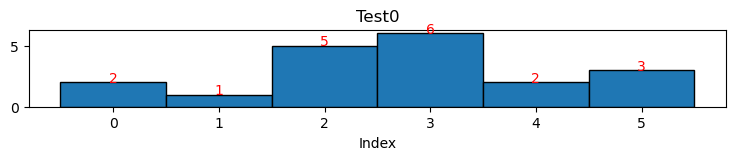

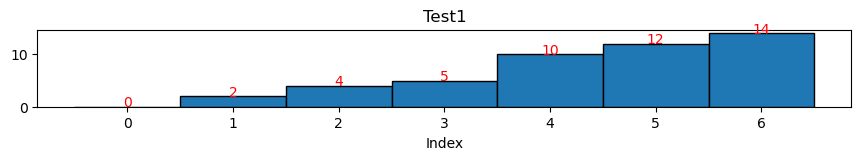

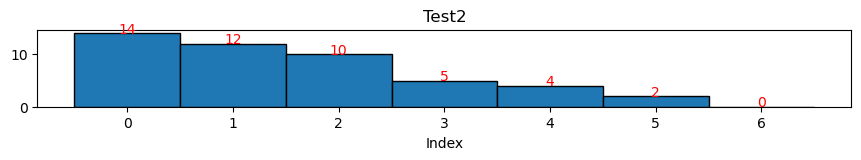

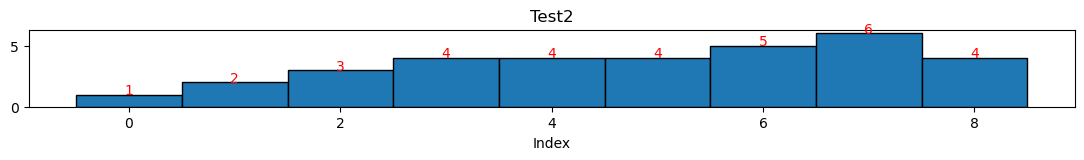

In [73]:
# test function
import matplotlib.pyplot as plt

def test(heights, test_name = ''):
    print(test_name)
    # show histogram
    plt.figure(figsize=(len(heights) * 1.5, 1))
    plt.bar(range(len(heights)), heights, width=1, edgecolor='black')
    plt.title(test_name)
    plt.xlabel('Index')
    for idx, h in enumerate(heights):
        plt.text(idx, h, int(h), ha='center', color='red')
        
    # show result
    print(f'Approach 1: {largestRectangleArea_1(heights)}')
    print(f'Approach 2: {largestRectangleArea_2(heights)}\n')

# test0
test([2,1,5,6,2,3], test_name = 'Test0')

# test1 - all increasing
test([0,2,4,5,10,12,14], test_name = 'Test1')

# test2 - all decreasing
test([0,2,4,5,10,12,14][::-1], test_name = 'Test2')

# test2 - some flat
test([1,2,3,4,4,4,5,6,4], test_name = 'Test2')